In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
df=pd.read_csv('C:/Users/satish.bogala/Documents/imdb.csv',escapechar="\\")

In [115]:
#1Answer
df['GenreCombo']=df[df.columns[16:]].T.apply(lambda g: '|'.join(g.index[g==1]),axis=0)
df.groupby(["type","year","GenreCombo"]).agg({"imdbRating":[min,max,np.mean],'duration':np.sum})

imdbRating                duration
                                                min  max      mean      sum
type     year GenreCombo                                                   
game     1972 Sport                             7.8  7.8  7.800000      0.0
         1980 Action                            6.1  6.1  6.100000      0.0
              Action|Family                     7.7  7.7  7.700000      0.0
         1981 Action|SciFi                      7.6  7.6  7.600000      0.0
         1982 Animation|Family                  7.3  7.3  7.300000      0.0
              Family                            6.9  6.9  6.900000      0.0
         1985 Action|Adventure                  6.5  6.5  6.500000      0.0
              Action|Adventure|Family           9.0  9.0  9.000000      0.0
         1987                                   6.8  6.8  6.800000      0.0
              Action                            6.7  6.7  6.700000      0.0
              Action|Adventure                  6.6  6.6  6.600000      0.0
              Action|Adventure|Fantasy          7.3  7.3  7.300000      0.0
         1988 Action|Adventure|Family           7.5  7.5  7.500000      0.0
              Action|Adventure|Thriller         6.7  6.7  6.700000      0.0
         1989 Action                            8.2  8.2  8.200000      0.0
              Action|Adventure|Family           7.5  7.5  7.500000      0.0
              Action|Adventure|Fantasy          8.0  8.0  8.000000      0.0
              Action|SciFi                      2.1  2.1  2.100000      0.0
         1990 Action|Adventure                  5.6  6.6  6.100000      0.0
              Action|Adventure|Family           9.1  9.1  9.100000      0.0
              Action|SciFi                      3.9  3.9  3.900000      0.0
              Adventure|Animation|Comedy        8.6  8.6  8.600000      0.0
         1991 Action|Adventure|Fantasy          9.0  9.0  9.000000      0.0
              Adventure|Animation|Comedy        8.5  8.5  8.500000      0.0
              Adventure|Fantasy|SciFi           8.2  8.2  8.200000      0.0
         1992 Action|Animation|Thriller         6.7  6.7  6.700000      0.0
         1993 Action|Animation|Family           7.2  7.2  7.200000      0.0
              Adventure|Animation|Comedy        8.3  8.5  8.400000      0.0
              Adventure|Animation|SciFi         7.5  7.5  7.500000      0.0
              Adventure|Horror|Mystery          8.2  8.2  8.200000      0.0
...                                             ...  ...       ...      ...
video.tv 2012 TalkShow                          4.9  7.4  5.933333   8460.0
         2013                                   6.5  7.4  7.100000  12900.0
              Action|Crime|Drama                7.3  8.3  7.950000  12300.0
              Action|Drama|History              8.6  8.6  8.600000   3600.0
              Action|Drama|SciFi                7.4  8.4  7.766667   8880.0
              Adventure|Drama|Fantasy           7.1  7.9  7.500000   5220.0
              Comedy                            7.1  8.2  7.766667   8880.0
              Comedy|Crime                      8.2  8.2  8.200000   1380.0
              Comedy|Crime|Drama                8.5  8.5  8.500000   3600.0
              Comedy|Drama                      8.7  8.7  8.700000   2820.0
              Comedy|Romance                    7.0  7.0  7.000000   2520.0
              Crime|Drama|Mystery               7.6  8.4  8.000000   5460.0
              Crime|Horror|Thriller             8.6  8.6  8.600000   2580.0
              Documentary|TalkShow              8.3  8.3  8.300000    600.0
              Drama|Fantasy                     7.8  7.8  7.800000   2520.0
              Drama|Mystery|SciFi               8.4  8.4  8.400000      0.0
              Horror|Mystery|Thriller           7.3  7.3  7.300000   2760.0
              TalkShow                          5.4  5.4  5.400000      0.0
         2014                                   6.7  7.8  7.250000  12840.0
             

0.0238267913621686

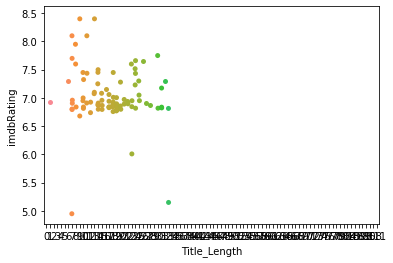

In [116]:
#2Answer
df['Title_Length']=df['title'].apply(lambda x:len(x.split('(')[0].rstrip()))
sns.stripplot(data=df,x='Title_Length',y=df.groupby("Title_Length")["imdbRating"].mean())
relation=df['Title_Length'].corr(df['imdbRating'])
relation

In [117]:
df['Quantile']=pd.qcut(df['Title_Length'],4,labels=False)
df1=pd.crosstab(df.year,df.Quantile,margins=False)
df1["min"]=df.groupby(["year"])["Title_Length"].min()
df1["max"]=df.groupby(["year"])["Title_Length"].max()
df1

Quantile,0,1,2,3,min,max
year,,,,,,
1888,0,0,1,1,21,29
1893,0,1,0,0,16,16
1894,0,0,0,1,31,31
1899,0,0,1,0,22,22
1900,0,1,0,0,16,16
1902,0,1,0,0,18,18
1903,0,0,2,0,23,27
1904,0,0,1,0,23,23
1910,0,1,0,0,17,17


In [139]:
#3Answer
df=pd.read_csv('C:/Users/satish.bogala/Documents/diamonds.csv')

In [140]:
df=df.mask(df.eq('None'))
df.fillna(value=0,inplace=True)
df['volumes']=df['x']*df['y']*(df['z'].astype("float32"))
df["volumes"][df["depth"]<=60]=8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [141]:
df["bins"]=pd.qcut(df["volumes"],q=5,labels=['1','2','3','4','5'])
df1=(pd.crosstab(df["bins"],df["cut"],normalize=True))*100
df1


cut,0,Fair,Good,Ideal,Premium,Very Good
bins,,,,,,
1,0.001854,0.524628,2.484104,5.153588,6.223236,5.615186
2,0.000000,0.087129,1.114139,11.391654,4.371281,3.032831
3,0.000000,0.619172,1.616521,9.702834,3.609365,4.456556
4,0.000000,1.051110,2.487811,6.330757,4.927423,5.198079
5,0.000000,0.702593,1.394064,7.372597,6.436424,4.095063


In [137]:
#5Answer
df=pd.read_csv('C:/Users/satish.bogala/Documents/imdb.csv',escapechar="\\")


In [138]:
df["decile"]=pd.qcut(df["duration"],10,labels=False)
df1=df.groupby("decile")[["nrOfNominations","nrOfWins"]].sum()
df1["count"]=df.groupby("decile")["year"].count()
df2=df.iloc[:,np.r_[8,17:45]]#data
df3=df2.groupby("decile")[df2.columns.tolist()[1:28]].sum()
df3=df3.transpose()
df4=pd.DataFrame(df3.apply(lambda df1: df1.nlargest(3).index,axis=0).transpose(),)
df4.columns=["1st","2nd","3rd"]
df1["Top Genres"]=df4["1st"]+","+df4["2nd"]+","+df4["3rd"]
df1

,nrOfNominations,nrOfWins,count,Top Genres
decile,,,,
0.0,7712,3259,1462,"Comedy,Animation,Short"
1.0,12738,4991,1110,"Drama,Comedy,Crime"
2.0,1512,1397,1213,"Comedy,Drama,Adventure"
3.0,2707,2231,1246,"Comedy,Drama,Horror"
4.0,3143,2565,1205,"Comedy,Drama,Crime"
5.0,4666,3735,1371,"Drama,Comedy,Crime"
6.0,4879,3848,1156,"Drama,Comedy,Romance"
7.0,6169,5242,1220,"Drama,Comedy,Crime"
8.0,9235,7678,1215,"Drama,Romance,Comedy"


In [131]:
a=df.groupby("title_year")["imdb_score"].mean().reset_index()
b=pd.DataFrame(df.groupby("title_year")["gross"].apply(lambda x: x.nlargest(3).index).reset_index())
b=b["gross"].apply(lambda x:df.loc[x,"movie_title"]).fillna("")
b["title"]=""
for j in range(0,74):
    for i in range(0,180):
        if(len(b.iloc[j,i])>1):
            b.iloc[j,180]=b.iloc[j,180]+b.iloc[j,i]+","
        else:
             b.iloc[j,180]=b.iloc[j,180]+b.iloc[j,i]
           
b["title"]=b["title"].map(lambda x: str(x)[:-1])
a.join(b).iloc[:,np.r_[0,1,182]]



KeyError: 'title_year'